# Plot forces for flow past cylinder

In [2]:
%%capture
import sys
#sys.path.insert(1, '../utilities')
#import load_alldata
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Basic problem parameters
D     = 6            # Cylinder diameter
U     = 20           # Freestream velocity
Lspan = 24           # Spanwise length
A     = D*Lspan      # frontal area
rho   = 1.225        # density
Q     = 0.5*rho*U*U  # Dynamic head

In [10]:
# Load the force data
forcedat = np.loadtxt('forces01.dat', skiprows=1)
t        = forcedat[:,0]*U/D  # Non-dimensional time

In [8]:
# Calculate the Cp, Cd
Cd = (forcedat[:,1]+forcedat[:,4])/(Q*A)
Cp = (forcedat[:,2]+forcedat[:,5])/(Q*A)

In [17]:
# Calculate time average
def timeaverage(time, f, t1, t2):
    filt = ((time[:] >= t1) & (time[:] <= t2))
    # Filtered time
    t     = time[filt]
    # The total time
    dt = np.amax(t) - np.amin(t)
    #  Filtered field
    filtf = f[filt]
     # Compute the time average as an integral
    avg = np.trapz(filtf, x=t, axis=0) / dt
    return avg

In [23]:
# Calculate averaged Cp, Cd
avgCd = timeaverage(t, Cd, 230.0, 330.0)
avgCp = timeaverage(t, Cp, 230.0, 330.0)
print("Avg Cd = %f"%avgCd)
print("Avg Cp = %f"%avgCp)

Avg Cd = 0.533482
Avg Cp = 0.058148


## Plot Lift and Drag coefficients

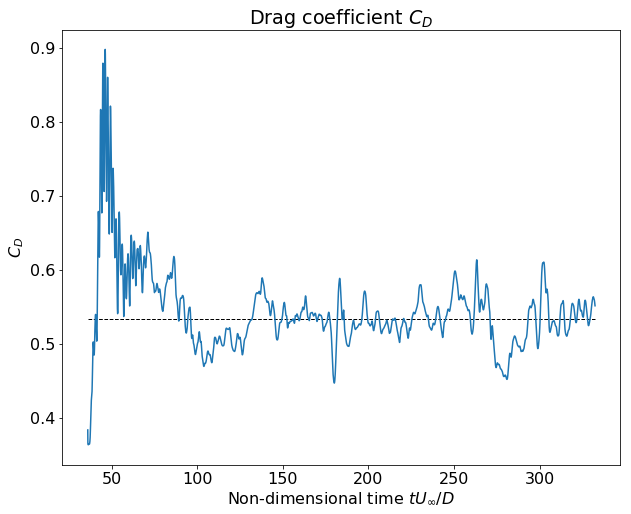

In [32]:
plt.rc('font', size=16)
plt.figure(figsize=(10,8))
plt.plot(t,Cd)
plt.hlines(avgCd, np.min(t), np.max(t), linestyles='dashed', linewidth=1)
plt.xlabel(r'Non-dimensional time $t U_{\infty}/D$');
plt.ylabel('$C_D$')
plt.title('Drag coefficient $C_D$');

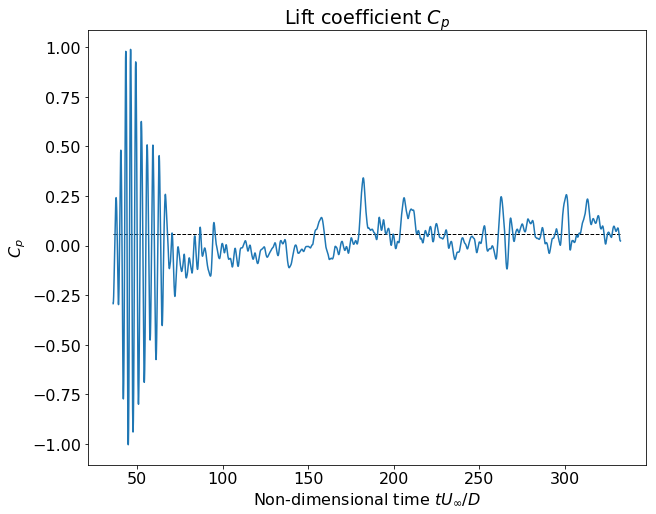

In [33]:
plt.figure(figsize=(10,8))
plt.plot(t,Cp)
plt.hlines(avgCp, np.min(t), np.max(t), linestyles='dashed', linewidth=1)
plt.xlabel(r'Non-dimensional time $t U_{\infty}/D$');
plt.ylabel('$C_p$')
plt.title('Lift coefficient $C_p$');